# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Rucha Sudhir Gurav

ID: 1001773732

Team Mate name : Gurpreet Singh

ID: 1001774414

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is about "Diabetes" data. 
The classification problem is whether they test Positive or Negative.



You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k , and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

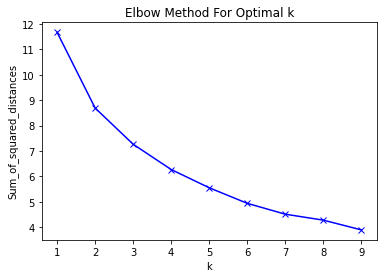

From the above graph we can clearly see that the elbow arises at k=3. Hence choosing k=3 as an optimal k value.


In [3]:
#########################begin code for Task 1-a
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

df=pd.read_csv("diabetes_data.csv")
a=df.apply(LabelEncoder().fit_transform)
X=a.iloc[:,:16]
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=X.columns)
X=data_scaled
Y=a["class"]
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("From the above graph we can clearly see that the elbow arises at k=3. Hence choosing k=3 as an optimal k value.")
#########################begin code for Task 1-a


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("diabetes_data.csv")
a=df.apply(LabelEncoder().fit_transform)
X=a.iloc[:,:16]
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=X.columns)
X=data_scaled
Y=a["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


###################end code for Task 1-b-1

Cluster Centers:
[[0.2236068  0.25       0.25       0.         0.25       0.2236068
  0.4736068  0.         0.2236068  0.         0.         0.
  0.         0.         0.2236068  0.        ]
 [0.98986787 0.0365869  0.02300315 0.02122609 0.01980247 0.02582345
  0.01940442 0.01064842 0.02138562 0.02070935 0.00973718 0.02023451
  0.02150444 0.01779154 0.01409468 0.00681447]]


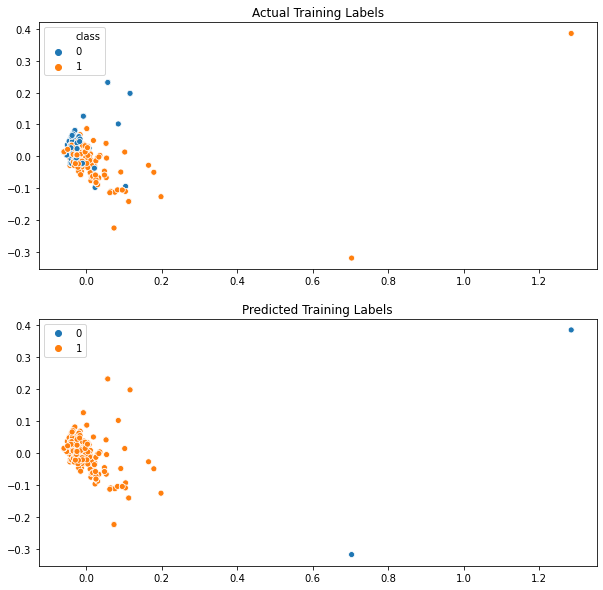

In [5]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# set to 2 dimensions
pca = PCA(n_components = 2)

# Create the KMeans model

# set 2 clusters for kmeans model
model = KMeans(n_clusters = 2)

# pass the training data to the kmeans model
model.fit(X_train)

# Compute cluster centers and predict cluster index for each sample 

# compute cluster centers
print('Cluster Centers:')
print(model.cluster_centers_)

# predict training data
train_pred = model.predict(X_train)

# Model and fit the data to the PCA model
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

plt.figure(figsize=(10, 10))

# scatter plot for actual training labels
plt.subplot(211)
plt.title('Actual Training Labels')
sns.scatterplot(x = x, y = y, hue = Y_train)

# scatter plot for predicted training labels
plt.subplot(212)
plt.title('Predicted Training Labels')
sns.scatterplot(x = x, y = y, hue = train_pred);


###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

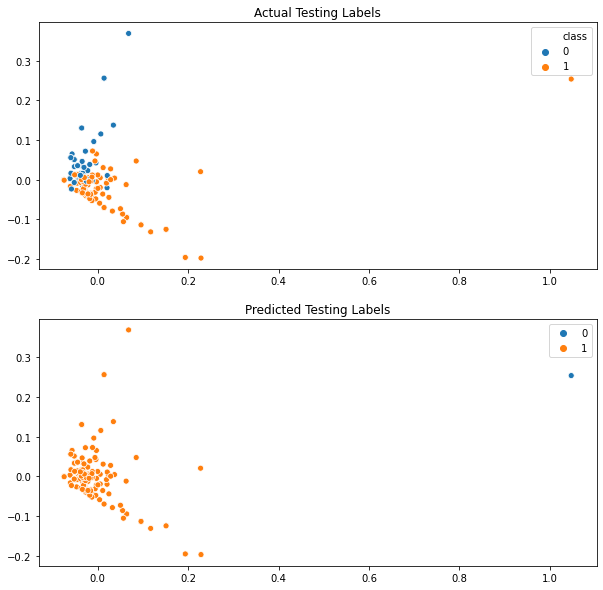

In [6]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 

# predict testing data
test_pred = model.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = pca.fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.figure(figsize=(10, 10))

# scatter plot for actual testing labels
plt.subplot(211)
plt.title('Actual Testing Labels')
sns.scatterplot(x = x, y = y, hue = Y_test)

# scatter plot for predicted testing labels
plt.subplot(212)
plt.title('Predicted Testing Labels')
sns.scatterplot(x = x, y = y, hue = test_pred);

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [7]:
###################begin code for Task 1-b-4: Print out a confusion matrix

# print the confusion matrix for predicted training labels and actual training labels
print('confusion matrix (training dataset):')
print(confusion_matrix(Y_train, train_pred))

# print the confusion matrix for predicted testing labels and actual testing labels
print('\nconfusion matrix (testing dataset):')
print(confusion_matrix(Y_test, test_pred))


###################end code for Task 1-b-4

confusion matrix (training dataset):
[[  0 138]
 [  2 224]]

confusion matrix (testing dataset):
[[ 0 62]
 [ 1 93]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [8]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import normalize
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("diabetes_data.csv")
# df.drop(['class'], axis=1, inplace = True)
a=df.apply(LabelEncoder().fit_transform)
X=a.iloc[:,:16]
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=X.columns)
X=data_scaled
Y=a["class"]

## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X)
print('Pairwise Distance Matrix for X:')
print(np.matrix(pdm_train))

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
model1= AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "complete")
cluster1 = model1.fit_predict(X)
# print(cluster1)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean

model2 = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "complete")
cluster2 = model2.fit_predict(X)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan

model3 = AgglomerativeClustering(n_clusters = 2, affinity = "manhattan", linkage = "complete")
cluster3 = model3.fit_predict(X)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
model4 = AgglomerativeClustering(n_clusters = 2, affinity = "cosine", linkage = "average")
cluster4 = model4.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
model5 = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "average")
cluster5 = model5.fit_predict(X)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
model6 = AgglomerativeClustering(n_clusters = 2, affinity = "manhattan", linkage = "average")
cluster6 = model6.fit_predict(X)

print("\n"+"F1-score for complete linkage + cosine",f1_score(Y,cluster1) )
print("F1-score for complete linkage + euclidean", f1_score(Y,cluster2))
print("F1-score for complete linkage + manhattan", f1_score(Y,cluster3))
print("F1-score for average linkage + cosine", f1_score(Y,cluster4))
print("F1-score for average linkage + euclidean",f1_score(Y,cluster5))
print("F1-score for average linkage + manhattan", f1_score(Y,cluster6))

###################end code for Task 2-a

Pairwise Distance Matrix for X:
[[0.         0.15473848 0.1199459  ... 0.15405505 0.20966977 0.16352534]
 [0.15473848 0.         0.14544734 ... 0.08292053 0.23828496 0.06424972]
 [0.1199459  0.14544734 0.         ... 0.14544735 0.2099076  0.15401313]
 ...
 [0.15405505 0.08292053 0.14544735 ... 0.         0.25917697 0.10395997]
 [0.20966977 0.23828496 0.2099076  ... 0.25917697 0.         0.27711365]
 [0.16352534 0.06424972 0.15401313 ... 0.10395997 0.27711365 0.        ]]

F1-score for complete linkage + cosine 0.006230529595015576
F1-score for complete linkage + euclidean 0.006230529595015576
F1-score for complete linkage + manhattan 0.7574671445639188
F1-score for average linkage + cosine 0.006230529595015576
F1-score for average linkage + euclidean 0.006230529595015576
F1-score for average linkage + manhattan 0.006230529595015576


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

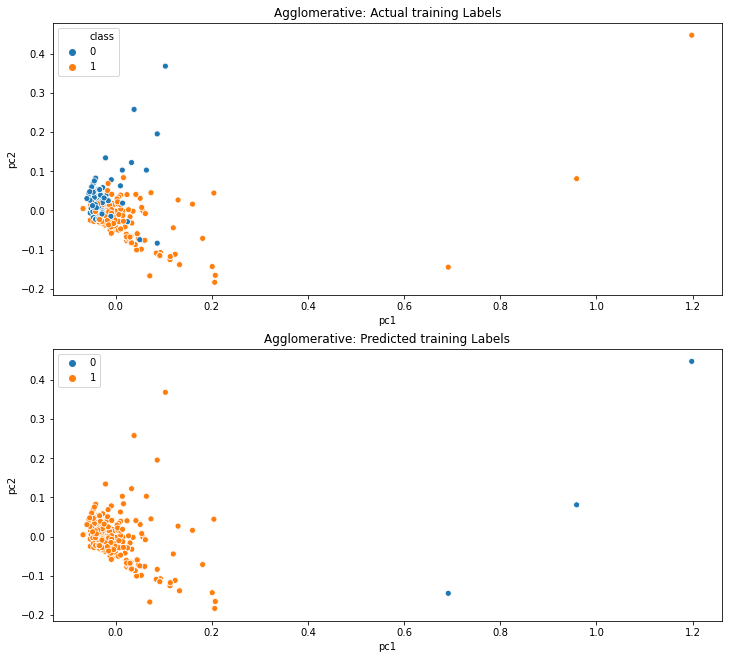

In [9]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 
# The best performed model was average linkage + manhattan which is the one with highest f1-score which
# is  0.7574671445639188.

# Reducing the acttributes to 2 using Principa Component Analysis
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])

x = X_pca.iloc[:, 0]
y = X_pca.iloc[:, 1]
plt.figure(figsize=(12, 11))
# scatter plot for actual testing labels
plt.subplot(211)
plt.title('Agglomerative: Actual training Labels')
sns.scatterplot(x = x, y = y, hue = Y)

# scatter plot for predicted testing labels
plt.subplot(212)
plt.title('Agglomerative: Predicted training Labels')
sns.scatterplot(x = x, y = y, hue = cluster3);
###################end code for Task 2-b

# TASK 3:  WEKA Visualization of K-means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a : Visualize the k-means clustering using weka

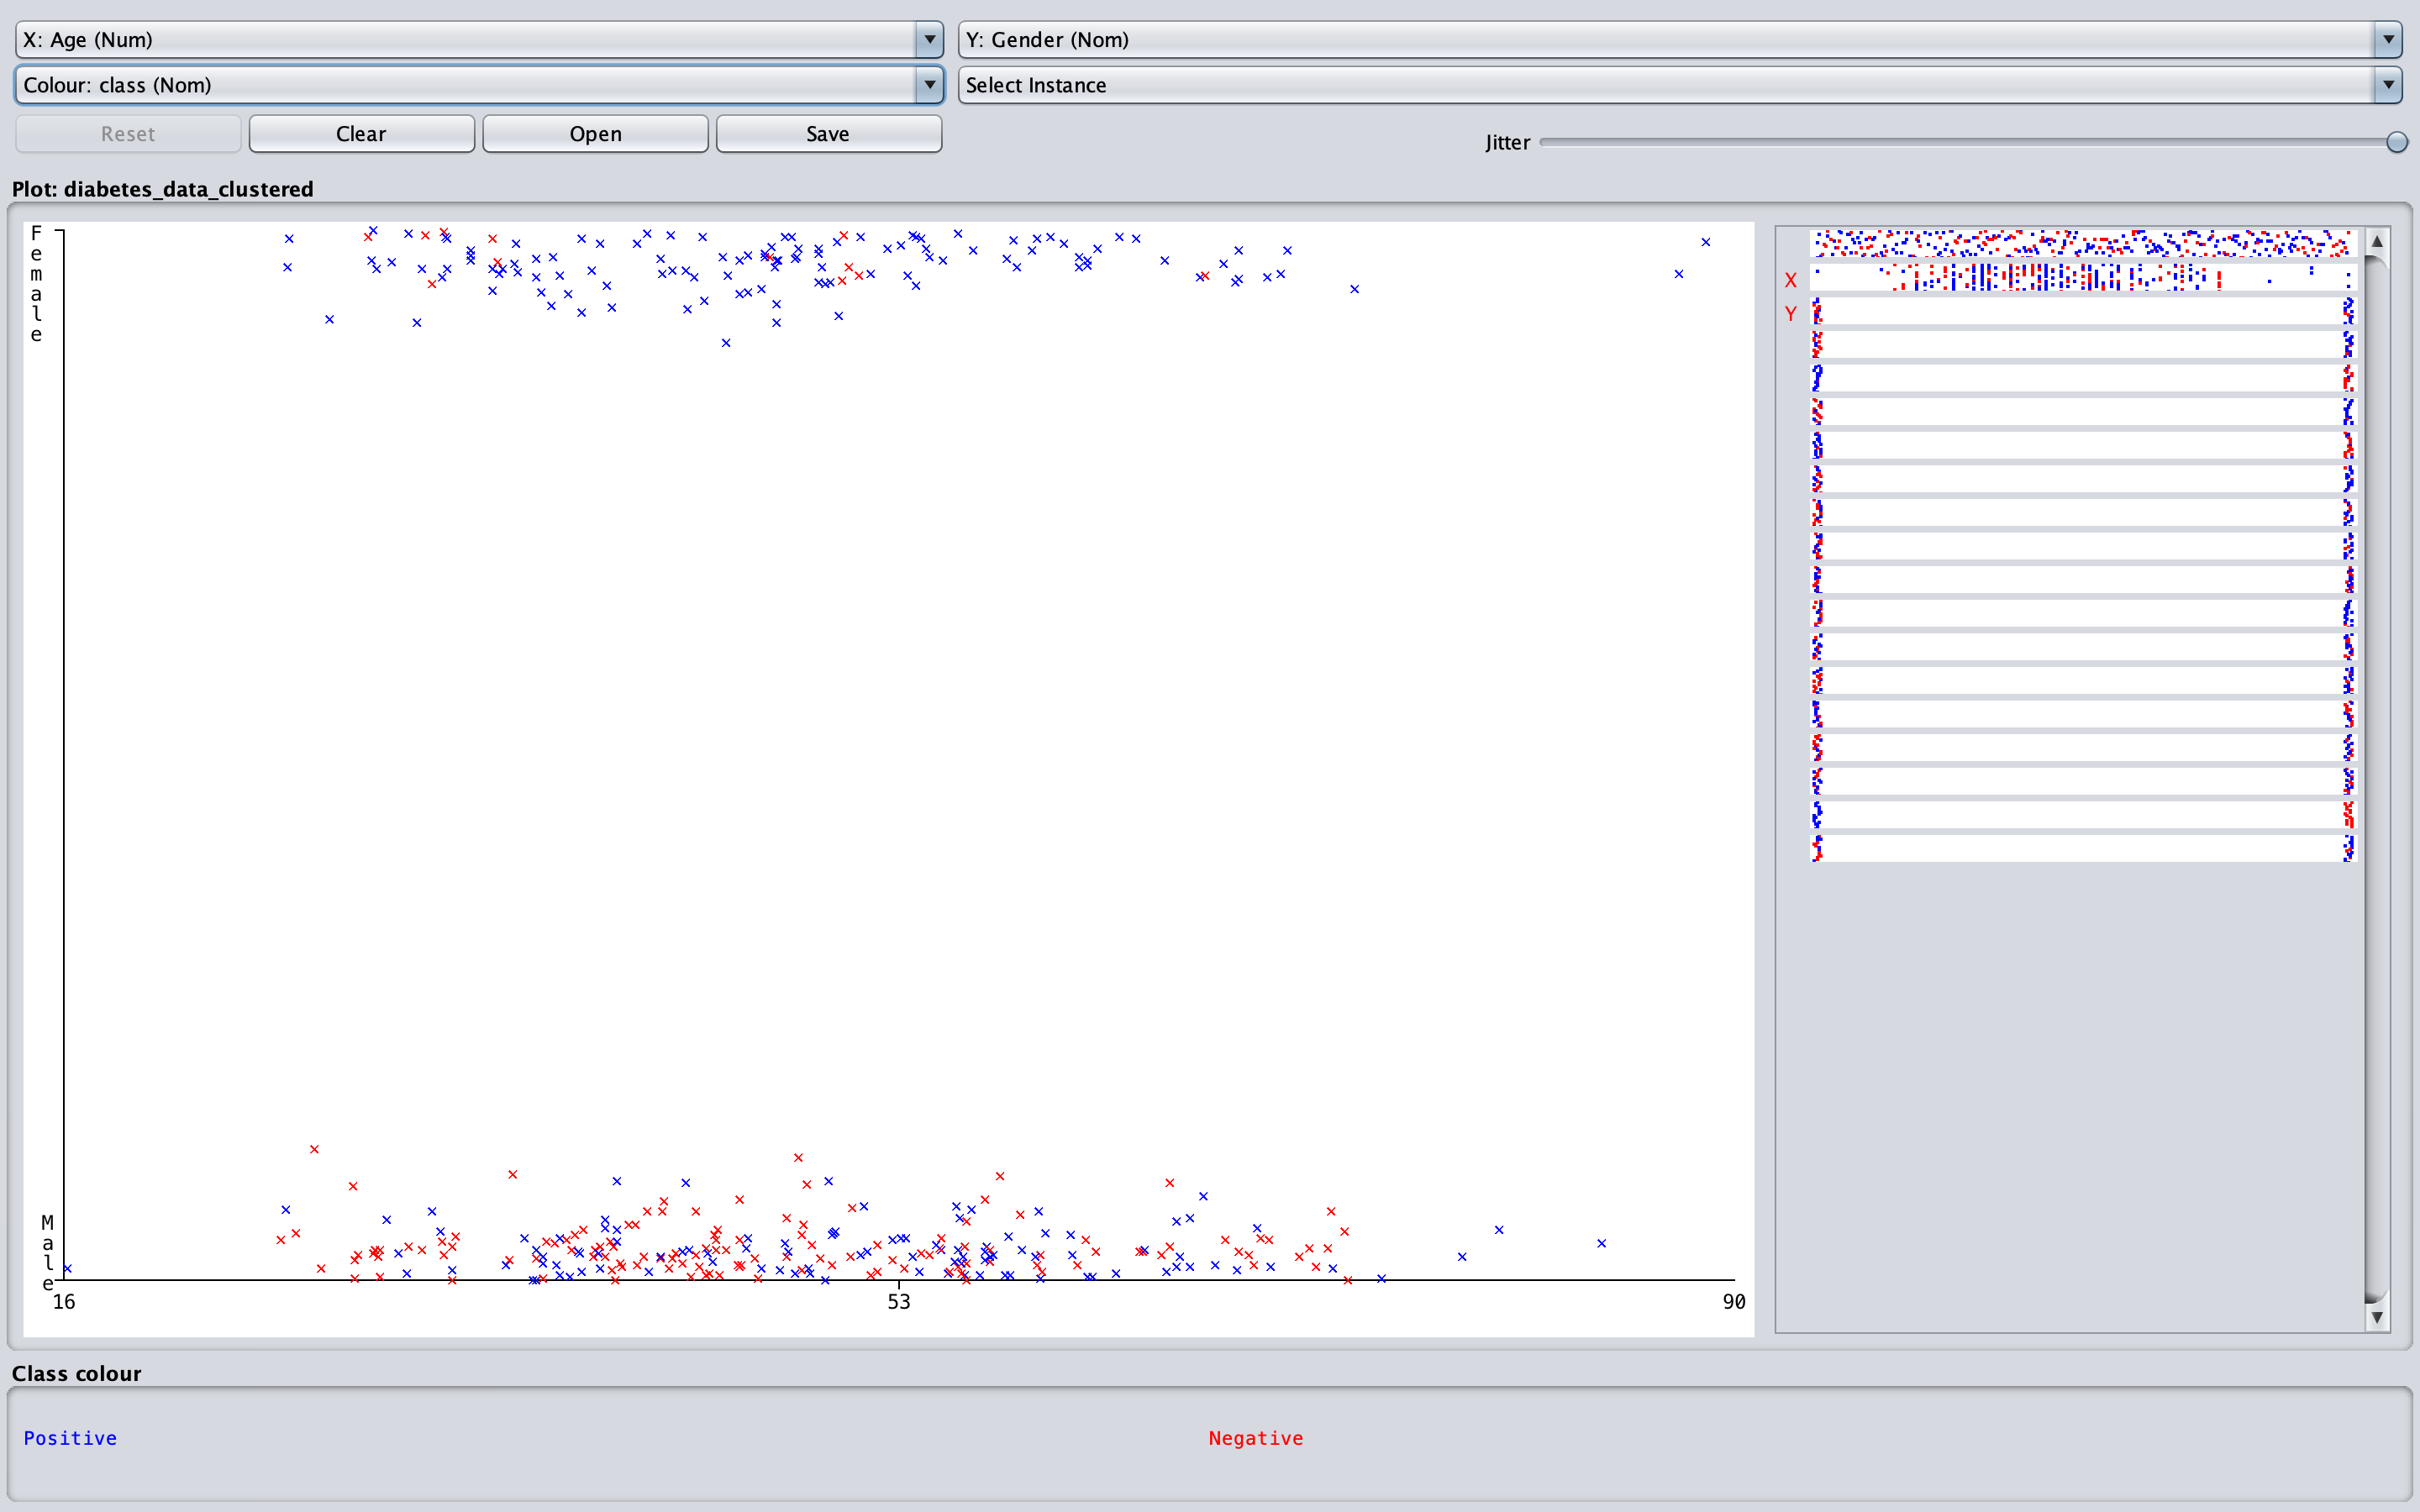

In [10]:
###################start Task 3-a

from IPython.display import Image
Image("kmeans.png")

###################end Task 3-a

## Task 3-b : Visualize the hierarchical clustering using weka

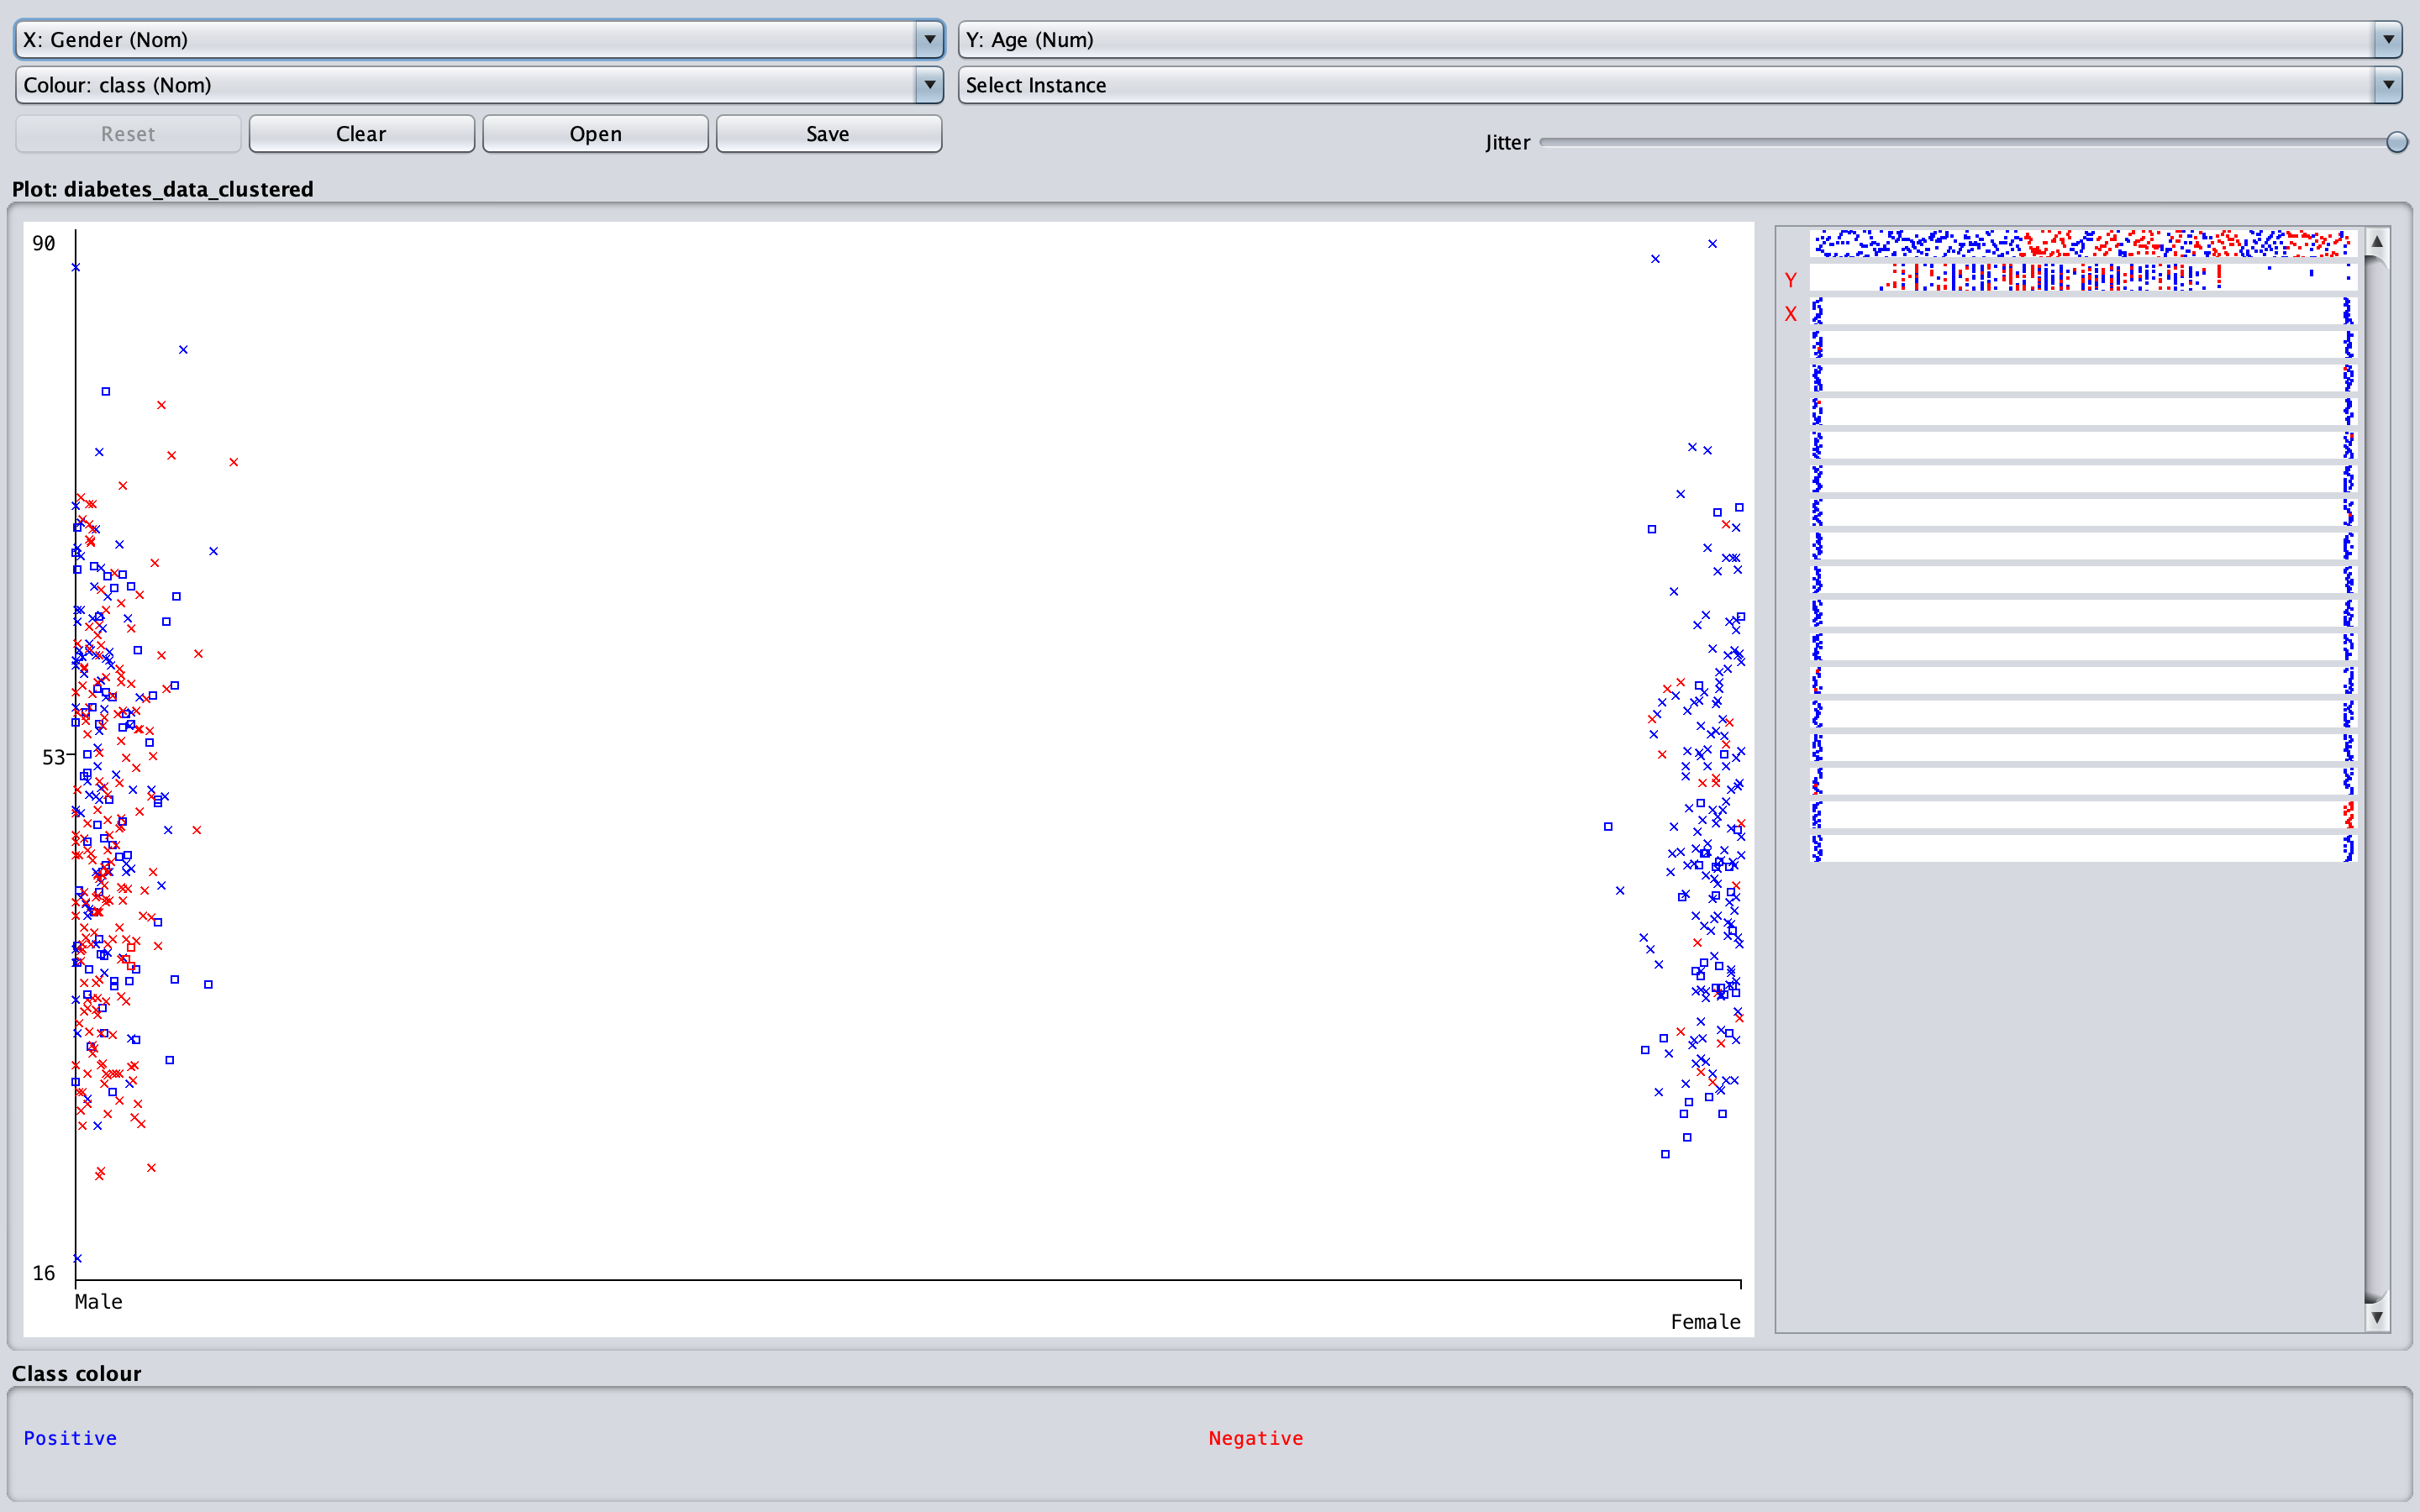

In [11]:
###################start Task 3-b
from IPython.display import Image
Image("hac.png")


###################end Task 3-b


# TASK 4:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 4-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

Pairwise Distance Matrix for X:
[[0.         0.15473848 0.1199459  ... 0.15405505 0.20966977 0.16352534]
 [0.15473848 0.         0.14544734 ... 0.08292053 0.23828496 0.06424972]
 [0.1199459  0.14544734 0.         ... 0.14544735 0.2099076  0.15401313]
 ...
 [0.15405505 0.08292053 0.14544735 ... 0.         0.25917697 0.10395997]
 [0.20966977 0.23828496 0.2099076  ... 0.25917697 0.         0.27711365]
 [0.16352534 0.06424972 0.15401313 ... 0.10395997 0.27711365 0.        ]]


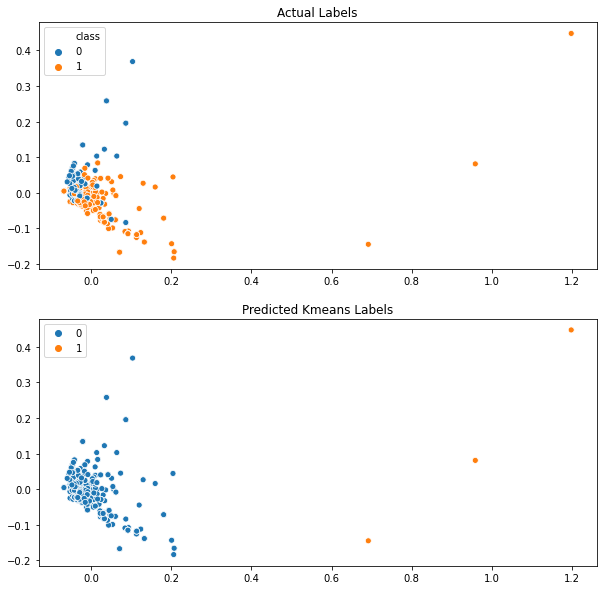

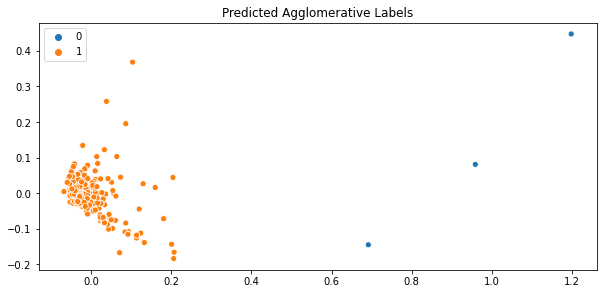

In [12]:
###################begin code for Task 4-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
Model = KMeans(n_clusters = 2)
label_kmean = Model.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(X, metric='euclidean')
print('Pairwise Distance Matrix for X:')
print(np.matrix(pdm_train))

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
model3 = AgglomerativeClustering(n_clusters = 2, affinity = "manhattan", linkage = "complete")
cluster3 = model3.fit_predict(X)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = pca.fit_transform(X)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_pca[:, 0]
y = X_pca[:, 1]

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.title('Actual Labels')
sns.scatterplot(x = x, y = y, hue = Y)

plt.subplot(212)
plt.title('Predicted Kmeans Labels')
sns.scatterplot(x = x, y = y, hue = label_kmean)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Predicted Agglomerative Labels')
sns.scatterplot(x = x, y = y, hue = cluster3);

###################end code for Task 3-a

## Task 4-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [13]:
###################begin code for Task 4-b
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

print("K-Means Clustering:")
print("\n"+"Confusion Matrix:"+"\n",confusion_matrix(Y, label_kmean))
print("\n"+"Classification report:"+"\n",classification_report(Y, label_kmean))

print("\n"+"Hierarchical Agglomerative clustering:")
print("\n"+"Confusion Matrix:"+"\n",confusion_matrix(Y, cluster3))
print("\n"+"Classification report:"+"\n",classification_report(Y, cluster3))

###################end code for Task 4-b

K-Means Clustering:

Confusion Matrix:
 [[200   0]
 [317   3]]

Classification report:
               precision    recall  f1-score   support

           0       0.39      1.00      0.56       200
           1       1.00      0.01      0.02       320

    accuracy                           0.39       520
   macro avg       0.69      0.50      0.29       520
weighted avg       0.76      0.39      0.23       520


Hierarchical Agglomerative clustering:

Confusion Matrix:
 [[  0 200]
 [  3 317]]

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.61      0.99      0.76       320

    accuracy                           0.61       520
   macro avg       0.31      0.50      0.38       520
weighted avg       0.38      0.61      0.47       520



## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[25 points] Task 1:</b>  

    [05 points] Task 1-a: Determine “k” value from the elbow method

    [20 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [05 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [05 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[30 points] Task 2:</b>  

    [20 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering

<b>[20 points] Task 3:</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points

<b>[20 points] Task 4:</b> 

    Task 4-a: 10 points

    Task 4-b: 10 points